In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from spec_id import Analyze_Stack_avgage_cont_feat,Highest_likelihood_model_galaxy,Scale_model,Gauss_dist
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [ ]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

IDc=[]  # compact sample
IDd=[]  # diffuse sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [9]:
galaxy=16
print ids[galaxy]
Pr,bfage,bfmetal=Analyze_Stack_avgage_cont_feat('chidat/%s_mar29_galfit_cont_chidata.fits' % ids[galaxy],
                                          'chidat/%s_mar29_galfit_feat_chidata.fits' % ids[galaxy],np.array(tau),metal,age)    
bfm,bfa,bft=Highest_likelihood_model_galaxy(ids[galaxy],rshift[galaxy],bfmetal,bfage,tau)

wv,fl,er=np.load('spec_stacks_jan24/%s_stack.npy' % ids[galaxy])
wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])

fp='../../../fsps_models_for_fit/galaxy_models/'

mwv,mfl=np.load(fp + 'm%s_a%s_t%s_z%s_%s_model.npy' % (bfm,bfa,bft,rshift[galaxy],ids[galaxy]))
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)

s40597
Best fit model is 3.4 Gyr and 0.005 Z

0.005 3.4 8.48


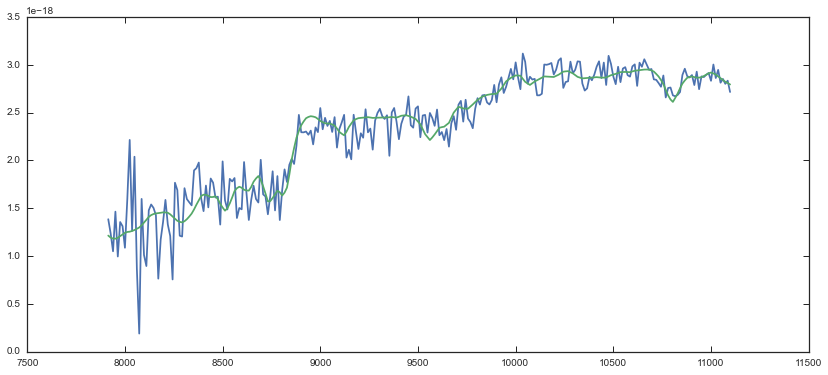

In [10]:
%matplotlib inline

print bfm,bfa,bft
plt.figure(figsize=[14,6])
plt.plot(wv,fl)
plt.plot(wv,C*imfl)
plt.show()
plt.close()

-0.0235912580585
0.939714168982


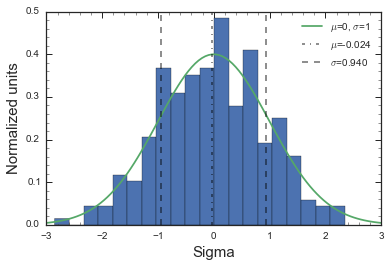

In [11]:
stdres=(fl-C*imfl)/er

print np.mean(stdres)
print np.std(stdres)

rng=np.linspace(-3,3,100)
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()

-0.0421918113565
0.941061357647


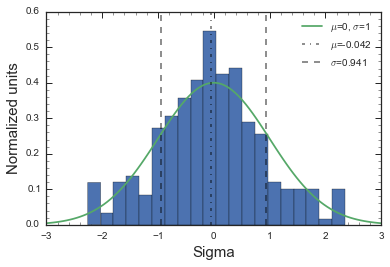

In [65]:
stdres=(fl-C*imfl)/np.sqrt(er**2+(.001*fl)**2)

print np.mean(stdres)
print np.std(stdres)

rng=np.linspace(-3,3,100)
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()

In [57]:
wv,fl,er=np.load('spec_stacks_jan24/%s_stack.npy' % ids[galaxy])
wv,fl,er=np.array([wv[wv<11100],fl[wv<11100],er[wv<11100]])
fp='../../../fsps_models_for_fit/galaxy_models/'

residuals=[]
for i in range(len(metal)):
    for ii in range(len(age)):
        mwv,mfl=np.load(fp + 'm%s_a%s_t0_z%s_%s_model.npy' % (metal[i],age[ii],rshift[galaxy],ids[galaxy]))   
        imfl=interp1d(mwv,mfl)(wv)
        C=Scale_model(fl,er,imfl)
        residuals.append((fl-C*imfl))
res=np.transpose(residuals)

meanres=np.abs(np.array([np.mean(U) for U in res])/er**2)

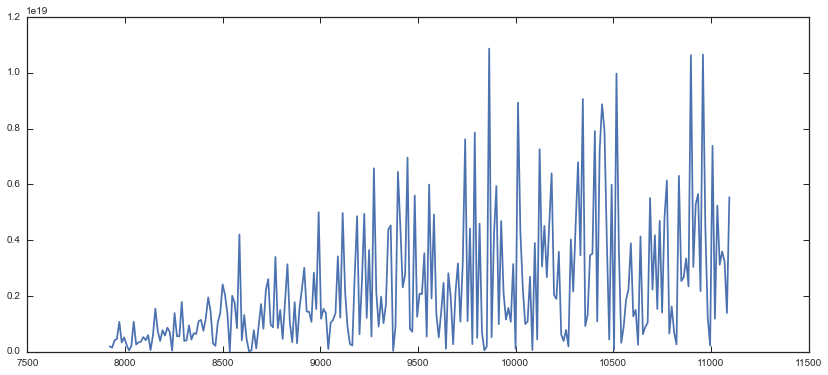

In [59]:
plt.figure(figsize=[14,6])
plt.plot(wv,meanres)
plt.show()
plt.close()

0.0179246276457
0.883615573742


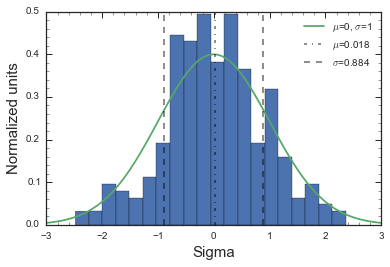

In [61]:
mwv,mfl=np.load(fp + 'm%s_a%s_t%s_z%s_%s_model.npy' % (bfm,bfa,bft,rshift[galaxy],ids[galaxy]))
imfl=interp1d(mwv,mfl)(wv)
C=Scale_model(fl,er,imfl)
stdres=(fl-C*imfl)/np.sqrt(er**2+(meanres/2E45)**2)

print np.mean(stdres)
print np.std(stdres)

rng=np.linspace(-3,3,100)
plt.hist(stdres,20,normed=True)
plt.plot(rng,Gauss_dist(rng,0,1),label='$\mu$=0, $\sigma$=1')
plt.axvline(np.mean(stdres),color='k',alpha=.5,linestyle='-.',label='$\mu$=%0.3f' % np.mean(stdres))
plt.axvline(np.std(stdres),color='k',alpha=.5,linestyle='--',label='$\sigma$=%0.3f' % np.std(stdres))
plt.axvline(-np.std(stdres),color='k',alpha=.5,linestyle='--')
plt.xlabel('Sigma',size=15)
plt.ylabel('Normalized units',size=15)
plt.legend()
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
plt.close()